In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error


In [33]:
#Load responses
url = 'https://raw.githubusercontent.com/DavidAgost-Beltran/rotation_perception_experiment/refs/heads/main/responses.csv'
df = pd.read_csv(url,header=0, on_bad_lines='skip')
print(df.head())


  gender age_group transformation  image_id_01  distortion_level_11  \
0    man     41-50       rotation            1                  2.0   
1    man     41-50       rotation            1                  3.0   
2    man     41-50       rotation            1                  4.0   
3    man     41-50       rotation            1                  6.0   
4    man     41-50       rotation            2                  3.0   

   distortion_level_12  distortion_level_21  distortion_level_22  \
0                  1.0                  4.0                  6.0   
1                  2.0                 10.0                  4.0   
2                  3.0                  6.0                  8.0   
3                  3.0                  1.0                  2.0   
4                  5.0                  9.0                  8.0   

   reaction_time_ms  answer  
0            3335.0       2  
1            3936.0       2  
2            5875.0       2  
3            3143.0       1  
4            7

In [34]:
url1= 'https://raw.githubusercontent.com/DavidAgost-Beltran/rotation_perception_experiment/refs/heads/main/mlds_gaussian_results.csv'
mlds_gaussian= pd.read_csv(url1,header=0, on_bad_lines='skip')

url2= 'https://raw.githubusercontent.com/DavidAgost-Beltran/rotation_perception_experiment/refs/heads/main/mlds_rotation_results.csv'
mlds_rotation= pd.read_csv(url2,header=0, on_bad_lines='skip')
url3= 'https://raw.githubusercontent.com/DavidAgost-Beltran/rotation_perception_experiment/refs/heads/main/rmse_consecutive_results.csv'
df_rmse_levels= pd.read_csv(url3,header=0, on_bad_lines='skip')

In [35]:
# Compute variance of sigma across images for rotation
variance_sigma = mlds_rotation['Sigma'].var()
print(f"Variance of Sigma (Rotation): {variance_sigma:.4f}")

# Compute variance of sigma across images for Gaussian noise
variance_sigma = mlds_gaussian['Sigma'].var()
print(f"Variance of Sigma (Gaussian): {variance_sigma:.4f}")


Variance of Sigma (Rotation): 0.0189
Variance of Sigma (Gaussian): 0.0104


# MLDS ROTATION

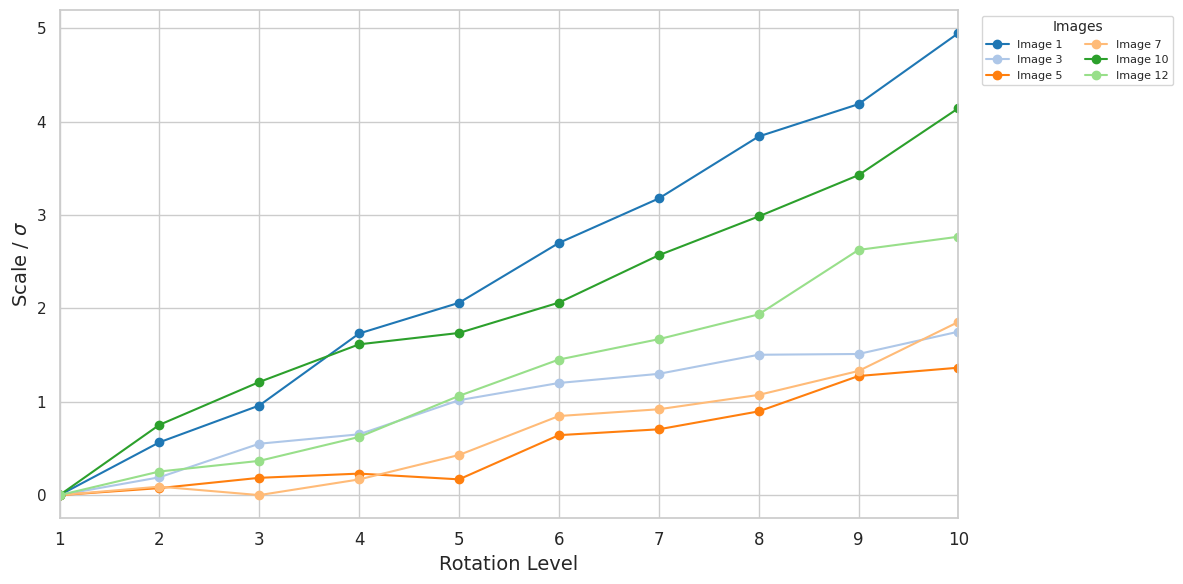

In [36]:
# Option 1: Select specific images manually
selected_images = [1, 3, 5, 7, 10, 12]  # Modify this list with desired image IDs

# Option 2: Uncomment the line below to include all images (from 1 to 24)
#selected_images = list(range(1, 25))

# Reshape data from wide to long
stimulus_columns = [col for col in mlds_rotation.columns if "Stimulus" in col]
df_melted = mlds_rotation.melt(
    id_vars=["Image_ID"],
    value_vars=stimulus_columns,
    var_name="Stimulus",
    value_name="Value"
)

# Extract stimulus level number
df_melted["Stimulus"] = df_melted["Stimulus"].str.extract(r'(\d+)').astype(int)

# Filter only selected images
df_filtered = df_melted[df_melted["Image_ID"].isin(selected_images)]

# Set style and initialize figure
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Generate distinct colors
unique_image_ids = sorted(df_filtered["Image_ID"].unique())
colors = []
colors.extend(plt.get_cmap('tab20').colors)
colors.extend(plt.get_cmap('Set2').colors)

# Plot each selected image
for i, image_id in enumerate(unique_image_ids):
    group = df_filtered[df_filtered["Image_ID"] == image_id]
    color = colors[i % len(colors)]
    plt.plot(group["Stimulus"], group["Value"], label=f"Image {image_id}", color=color,marker='o')

# Labels and legend
plt.xlabel("Rotation Level", fontsize=14)
plt.ylabel(r'Scale / $\sigma$', fontsize=14)
plt.xticks(ticks=sorted(df_filtered["Stimulus"].unique()), fontsize=12)
plt.xlim(1, df_filtered["Stimulus"].max())

plt.legend(title="Images", fontsize=8, title_fontsize=10, loc='upper left', ncol=2, bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()


# MLDS GAUSSIAN NOISE

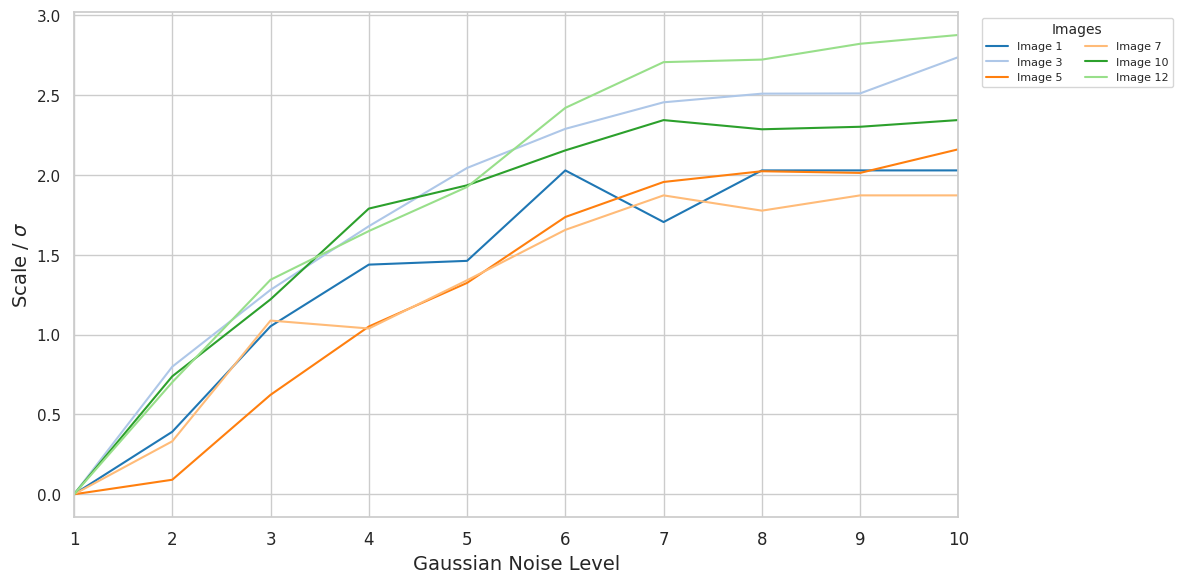

In [37]:
# Option 1: Select specific images manually
selected_images = [1, 3, 5, 7, 10, 12]  # Modify this list with desired image IDs

# Option 2: Uncomment the line below to include all images (from 1 to 24)
# selected_images = list(range(1, 25))

# Reshape the dataframe for plotting
stimulus_columns = [col for col in mlds_gaussian.columns if "Stimulus" in col]
df_melted = mlds_gaussian.melt(
    id_vars=["Image_ID"],
    value_vars=stimulus_columns,
    var_name="Stimulus",
    value_name="Value"
)

# Extract stimulus numbers as integers
df_melted["Stimulus"] = df_melted["Stimulus"].str.extract(r'(\d+)').astype(int)

# Filter the dataframe to only include selected images
df_filtered = df_melted[df_melted["Image_ID"].isin(selected_images)]

# Prepare the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Generate color palette
unique_image_ids = sorted(df_filtered["Image_ID"].unique())
colors = []
colors.extend(plt.get_cmap('tab20').colors)  # 20 colors
colors.extend(plt.get_cmap('Set2').colors)   # 8 colors

# Plot each selected image
for i, image_id in enumerate(unique_image_ids):
    group = df_filtered[df_filtered["Image_ID"] == image_id]
    color = colors[i % len(colors)]  # Assign color cyclically
    plt.plot(group["Stimulus"], group["Value"], label=f"Image {image_id}",
             color=color)

# Customize axes and legend
plt.xlabel("Gaussian Noise Level", fontsize=14)
plt.ylabel(r'Scale / $\sigma$', fontsize=14)
plt.xticks(ticks=sorted(df_filtered["Stimulus"].unique()), fontsize=12)
plt.xlim(1, df_filtered["Stimulus"].max())

plt.legend(title="Images", fontsize=8, title_fontsize=10, loc='upper left', ncol=2, bbox_to_anchor=(1.02, 1))

# Display
plt.tight_layout()
plt.show()


# ACCUM RMSE ROTATION

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

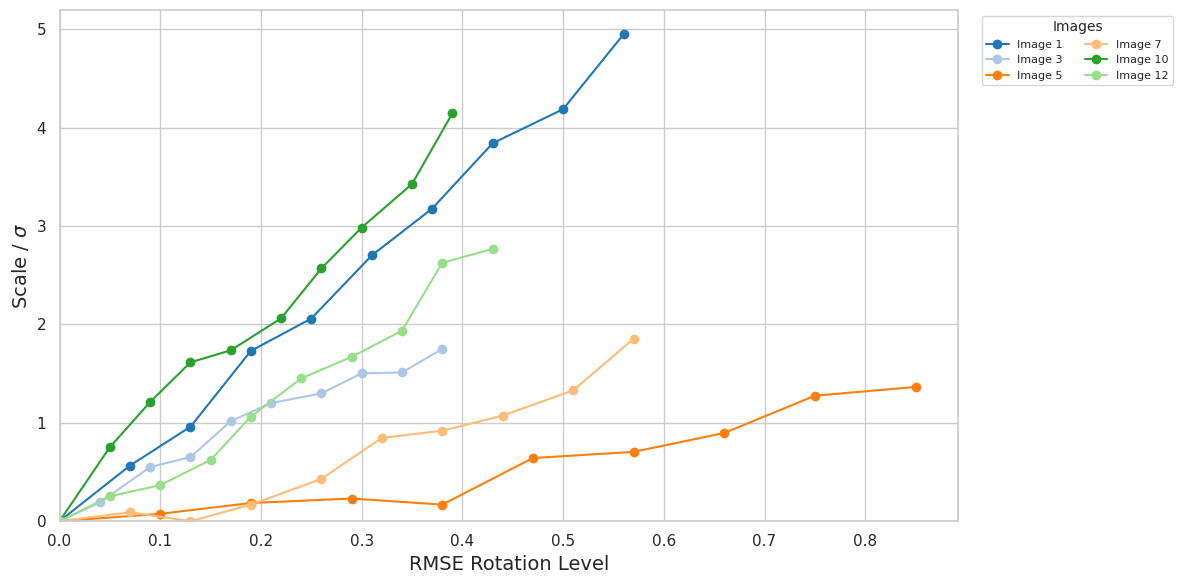

In [38]:
# Option 1: Select specific images manually
selected_images = [1, 3, 5, 7, 10, 12]  # Modify this list with desired image IDs

# Option 2: Uncomment the line below to include all images (from 1 to 24)
# selected_images = list(range(1, 25))

# --- Filter the rotation data for selected images ---
df_rmse_rotation = df_rmse_levels[
    (df_rmse_levels['Transformation'] == 'rotation') &
    (df_rmse_levels['Image_ID'].isin(selected_images))
]

# Merge MLDS perceptual data with RMSE data
df_combined = pd.merge(mlds_rotation, df_rmse_rotation, on='Image_ID')

# Dictionary to store perceptual curves for each image
image_curves = {}

# Loop through each image and compute accumulated RMSE and perceptual scale
for image_id, group in df_combined.groupby('Image_ID'):
    # Map pairwise RMSE values between adjacent distortion levels
    rmse_mapping = {(row['Level_A'], row['Level_B']): row['RMSE'] for _, row in group.iterrows()}

    # Get stimulus columns from MLDS results
    stimulus_columns = [col for col in group.columns if col.startswith('Stimulus_')]
    stimulus_data = group[stimulus_columns].iloc[0]

    # Initialize RMSE and perceptual scale lists
    accumulated_sum = 0
    x_vals = [0.0]  # Accumulated RMSE
    y_vals = [0.0]  # Perceptual scale starting from baseline

    # Loop through each stimulus level and compute accumulated RMSE
    for col in stimulus_columns[1:]:  # Skip Stimulus_1 (already at 0.0)
        level = int(col.split('_')[1])
        prev_level = level - 1

        if (prev_level, level) in rmse_mapping:
            accumulated_sum += rmse_mapping[(prev_level, level)]

        x_vals.append(round(accumulated_sum, 2))
        y_vals.append(stimulus_data[col])

    # Store the result in dictionary
    image_curves[image_id] = {'x': x_vals, 'y': y_vals}

    plt.figure(figsize=(12, 6));

colors = []
colors.extend(plt.get_cmap('tab20').colors)
colors.extend(plt.get_cmap('Set2').colors)

for i, (image_id, data) in enumerate(image_curves.items()):
    x = data['x']
    y = data['y']
    color = colors[i % len(colors)]
    plt.plot(x, y, 'o-', color=color, label=f'Image {image_id}')

plt.legend(title="Images", fontsize=8, title_fontsize=10, loc='upper left', ncol=2, bbox_to_anchor=(1.02, 1))
plt.xlabel('RMSE Rotation Level', fontsize=14)
plt.ylabel(r'Scale / $\sigma$', fontsize=14)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# ACCUM RMSE GAUSSIAN

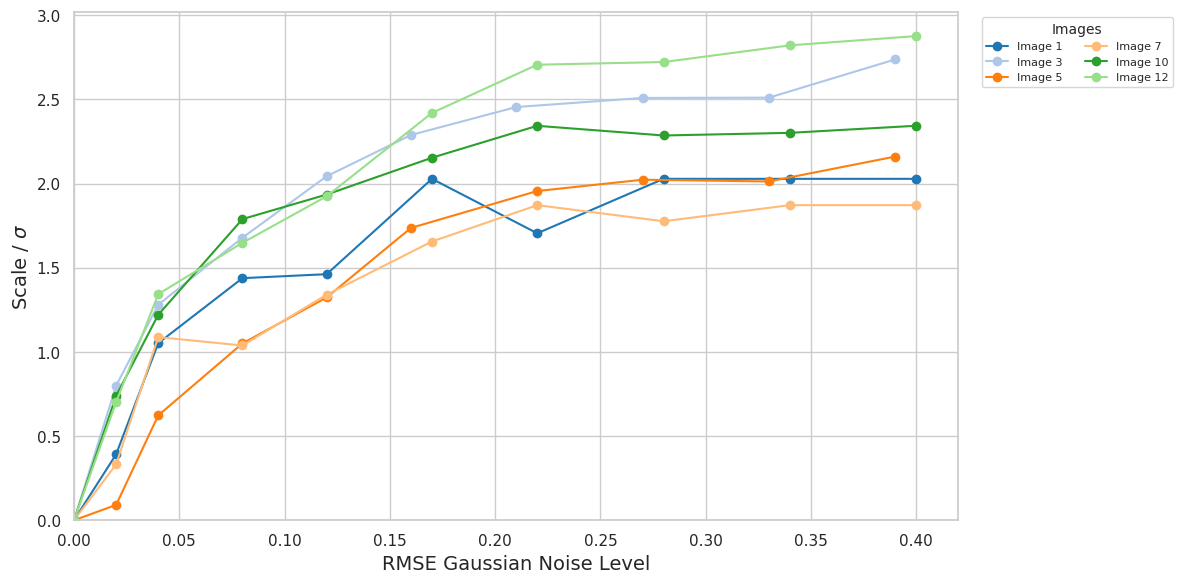

In [39]:
# Option 1: Select specific images manually
selected_images = [1, 3, 5, 7, 10, 12]  # Modify this list with desired image IDs

# Option 2: Uncomment the line below to include all images (from 1 to 24)
# selected_images = list(range(1, 25))
# Filter and combine data for Gaussian noise
df_rmse_gaussian = df_rmse_levels[df_rmse_levels['Transformation'] == 'gaussian_noise']
df_combined = pd.merge(mlds_gaussian, df_rmse_gaussian, on='Image_ID')

# Dictionary to store perceptual curves
image_curves_gaussian = {}

for image_id, group in df_combined.groupby('Image_ID'):
    rmse_mapping = {(row['Level_A'], row['Level_B']): row['RMSE'] for _, row in group.iterrows()}
    stimulus_columns = [col for col in group.columns if col.startswith('Stimulus_')]
    stimulus_data = group[stimulus_columns].iloc[0]

    accumulated_sum = 0.0
    x_vals = [0.0]
    y_vals = [0.0]

    # Compute accumulated RMSE and perceptual values
    for col in sorted(stimulus_columns[1:], key=lambda x: int(x.split('_')[1])):
        level = int(col.split('_')[1])
        prev_level = level - 1
        if (prev_level, level) in rmse_mapping:
            accumulated_sum += rmse_mapping[(prev_level, level)]
        x_vals.append(round(accumulated_sum, 2))
        y_vals.append(stimulus_data[col])

    image_curves_gaussian[image_id] = {'x': x_vals, 'y': y_vals}



# Plot
plt.figure(figsize=(12, 6));  # Semicolon suppresses <Figure ...> output
colors = []
colors.extend(plt.get_cmap('tab20').colors)
colors.extend(plt.get_cmap('Set2').colors)

for i, image_id in enumerate(selected_images):
    if image_id in image_curves_gaussian:
        x = image_curves_gaussian[image_id]['x']
        y = image_curves_gaussian[image_id]['y']
        color = colors[i % len(colors)]
        plt.plot(x, y, 'o-', color=color, label=f'Image {image_id}')

plt.xlabel('RMSE Gaussian Noise Level', fontsize=14)
plt.ylabel(r'Scale / $\sigma$', fontsize=14)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend(title="Images", fontsize=8, title_fontsize=10, loc='upper left', ncol=2, bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


# Mean MLDS curves

### Mean Curve rotation

In [40]:
# Extracts all columns related to stimulus responses
stimulus_columns = [col for col in mlds_rotation.columns if "Stimulus" in col]

# Converts the DataFrame to long format for analysis and plotting
df_melted = mlds_rotation.melt(
    id_vars=["Image_ID"],
    value_vars=stimulus_columns,
    var_name="Stimulus",
    value_name="Value"
)

# Simplifies stimulus labels by extracting numeric identifiers
df_melted["Stimulus"] = df_melted["Stimulus"].str.extract(r'(\d+)').astype(int)


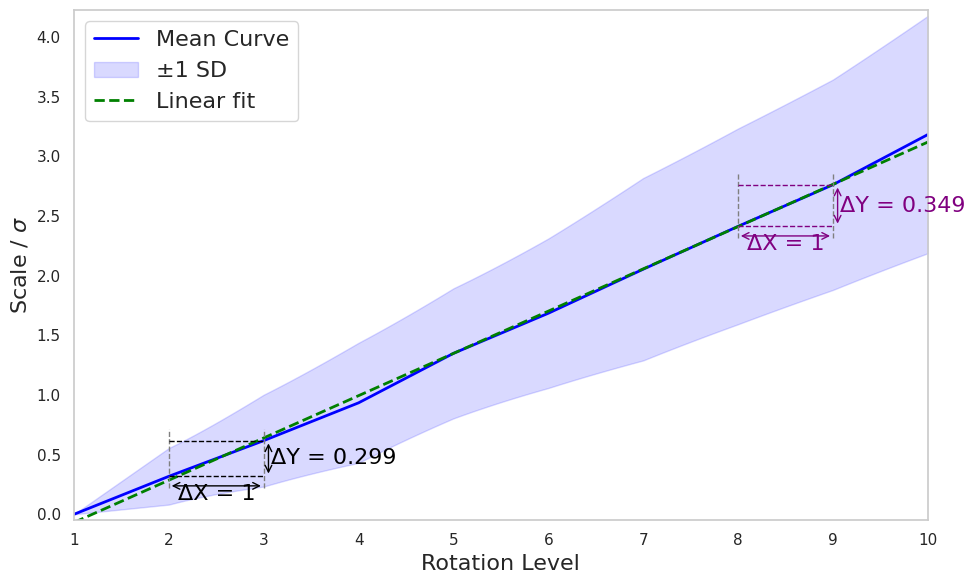

MSE (linear): 0.000862
AIC (linear): -701.61
BIC (linear): -696.40


In [41]:
# Create dictionary of curves per image
curves_dict = {}
for image_id, group in df_melted.groupby("Image_ID"):
    x = group["Stimulus"].values
    y = group["Value"].values
    curves_dict[image_id] = {'x': x, 'y': y}

# Define common x-grid (from 1 to 10, 100 points)
x_common = np.linspace(1, 10, 100)
y_interp_all = []

# Interpolate all curves onto the common grid
for curve in curves_dict.values():
    f = interp1d(curve['x'], curve['y'], kind='linear', fill_value="extrapolate")
    y_interp = f(x_common)
    y_interp_all.append(y_interp)

# Compute mean and standard deviation
y_interp_all = np.array(y_interp_all)
y_mean = np.mean(y_interp_all, axis=0)
y_std = np.std(y_interp_all, axis=0)

# Compute increments at specific levels
y_2 = np.interp(2, x_common, y_mean)
y_3 = np.interp(3, x_common, y_mean)
y_8 = np.interp(8, x_common, y_mean)
y_9 = np.interp(9, x_common, y_mean)

inc_2_3 = y_3 - y_2
inc_8_9 = y_9 - y_8

# Fit linear model
def linear(x, a, b):
    return a * x + b

n = len(x_common)
popt_lin, _ = curve_fit(linear, x_common, y_mean)
y_pred_lin = linear(x_common, *popt_lin)
mse_lin = mean_squared_error(y_mean, y_pred_lin)
aic_lin = n * np.log(mse_lin) + 2 * 2
bic_lin = n * np.log(mse_lin) + 2 * np.log(n)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_common, y_mean, label='Mean Curve', color='blue', linewidth=2)
plt.fill_between(x_common, y_mean - y_std, y_mean + y_std, color='blue', alpha=0.15, label='±1 SD')
plt.plot(x_common, y_pred_lin, '--', color='green', linewidth=2, label='Linear fit')

# Vertical lines for ΔX segments
plt.vlines([2, 3], y_2 - 0.1, y_3 + 0.1, colors='gray', linestyle='--', linewidth=1)
plt.vlines([8, 9], y_8 - 0.1, y_9 + 0.1, colors='gray', linestyle='--', linewidth=1)

# Horizontal lines for ΔY
plt.hlines([y_2, y_3], 2, 3, colors='black', linestyles='--', linewidth=1)
plt.hlines([y_8, y_9], 8, 9, colors='purple', linestyles='--', linewidth=1)

# ΔX annotations
plt.annotate('', xy=(3, y_2 - 0.08), xytext=(2, y_2 - 0.08),
             arrowprops=dict(arrowstyle='<->', color='black'))
plt.text(2.5, y_2 - 0.2, "ΔX = 1", ha='center', fontsize=16, color='black')

plt.annotate('', xy=(9, y_8 - 0.08), xytext=(8, y_8 - 0.08),
             arrowprops=dict(arrowstyle='<->', color='purple'))
plt.text(8.5, y_8 - 0.2, "ΔX = 1", ha='center', fontsize=16, color='purple')

# ΔY annotations
plt.annotate('', xy=(3.05, y_3), xytext=(3.05, y_2),
             arrowprops=dict(arrowstyle='<->', color='black'))
plt.text(3.08, (y_2 + y_3)/2, f"ΔY = {inc_2_3:.3f}", color='black', fontsize=16, va='center')

plt.annotate('', xy=(9.05, y_9), xytext=(9.05, y_8),
             arrowprops=dict(arrowstyle='<->', color='purple'))
plt.text(9.08, (y_8 + y_9)/2, f"ΔY = {inc_8_9:.3f}", color='purple', fontsize=16, va='center')

# Formatting
plt.xlabel('Rotation Level', fontsize=16)
plt.ylabel(r'Scale / $\sigma$', fontsize=16)
plt.xlim(x_common.min(), x_common.max())
plt.ylim((y_mean - y_std).min() - 0.05, (y_mean + y_std).max() + 0.05)
plt.legend(fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()

# Output metrics
print(f"MSE (linear): {mse_lin:.6f}")
print(f"AIC (linear): {aic_lin:.2f}")
print(f"BIC (linear): {bic_lin:.2f}")


### Mean curve gaussian noise

In [42]:
# Extracts all columns related to stimulus responses
stimulus_columns = [col for col in mlds_gaussian.columns if "Stimulus" in col]

# Converts the DataFrame to long format for analysis and plotting
df_melted = mlds_gaussian.melt(
    id_vars=["Image_ID"],
    value_vars=stimulus_columns,
    var_name="Stimulus",
    value_name="Value"
)

# Simplifies stimulus labels by extracting numeric identifiers
df_melted["Stimulus"] = df_melted["Stimulus"].str.extract(r'(\d+)').astype(int)


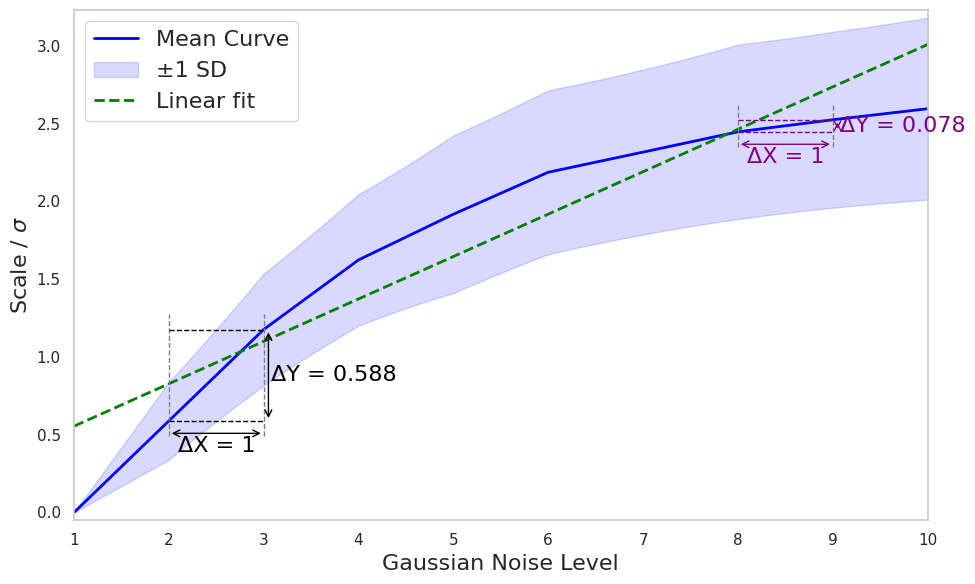

MSE (linear): 0.059005
AIC (linear): -279.01
BIC (linear): -273.80


In [43]:
# Create dictionary of curves per image
curves_dict = {}
for image_id, group in df_melted.groupby("Image_ID"):
    x = group["Stimulus"].values
    y = group["Value"].values
    curves_dict[image_id] = {'x': x, 'y': y}

# Define common x-grid (from 1 to 10, 100 points)
x_common = np.linspace(1, 10, 100)
y_interp_all = []

# Interpolate all curves onto the common grid
for curve in curves_dict.values():
    f = interp1d(curve['x'], curve['y'], kind='linear', fill_value="extrapolate")
    y_interp = f(x_common)
    y_interp_all.append(y_interp)

# Compute mean and standard deviation
y_interp_all = np.array(y_interp_all)
y_mean = np.mean(y_interp_all, axis=0)
y_std = np.std(y_interp_all, axis=0)

# Compute increments at specific levels
y_2 = np.interp(2, x_common, y_mean)
y_3 = np.interp(3, x_common, y_mean)
y_8 = np.interp(8, x_common, y_mean)
y_9 = np.interp(9, x_common, y_mean)

inc_2_3 = y_3 - y_2
inc_8_9 = y_9 - y_8

# Fit linear model
def linear(x, a, b):
    return a * x + b

n = len(x_common)
popt_lin, _ = curve_fit(linear, x_common, y_mean)
y_pred_lin = linear(x_common, *popt_lin)
mse_lin = mean_squared_error(y_mean, y_pred_lin)
aic_lin = n * np.log(mse_lin) + 2 * 2
bic_lin = n * np.log(mse_lin) + 2 * np.log(n)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_common, y_mean, label='Mean Curve', color='blue', linewidth=2)
plt.fill_between(x_common, y_mean - y_std, y_mean + y_std, color='blue', alpha=0.15, label='±1 SD')
plt.plot(x_common, y_pred_lin, '--', color='green', linewidth=2, label='Linear fit')

# Vertical lines for ΔX segments
plt.vlines([2, 3], y_2 - 0.1, y_3 + 0.1, colors='gray', linestyle='--', linewidth=1)
plt.vlines([8, 9], y_8 - 0.1, y_9 + 0.1, colors='gray', linestyle='--', linewidth=1)

# Horizontal lines for ΔY
plt.hlines([y_2, y_3], 2, 3, colors='black', linestyles='--', linewidth=1)
plt.hlines([y_8, y_9], 8, 9, colors='purple', linestyles='--', linewidth=1)

# ΔX annotations
plt.annotate('', xy=(3, y_2 - 0.08), xytext=(2, y_2 - 0.08),
             arrowprops=dict(arrowstyle='<->', color='black'))
plt.text(2.5, y_2 - 0.2, "ΔX = 1", ha='center', fontsize=16, color='black')

plt.annotate('', xy=(9, y_8 - 0.08), xytext=(8, y_8 - 0.08),
             arrowprops=dict(arrowstyle='<->', color='purple'))
plt.text(8.5, y_8 - 0.2, "ΔX = 1", ha='center', fontsize=16, color='purple')

# ΔY annotations
plt.annotate('', xy=(3.05, y_3), xytext=(3.05, y_2),
             arrowprops=dict(arrowstyle='<->', color='black'))
plt.text(3.08, (y_2 + y_3)/2, f"ΔY = {inc_2_3:.3f}", color='black', fontsize=16, va='center')

plt.annotate('', xy=(9.05, y_9), xytext=(9.05, y_8),
             arrowprops=dict(arrowstyle='<->', color='purple'))
plt.text(9.08, (y_8 + y_9)/2, f"ΔY = {inc_8_9:.3f}", color='purple', fontsize=16, va='center')

# Formatting
plt.xlabel('Gaussian Noise Level', fontsize=16)
plt.ylabel(r'Scale / $\sigma$', fontsize=16)
plt.xlim(x_common.min(), x_common.max())
plt.ylim((y_mean - y_std).min() - 0.05, (y_mean + y_std).max() + 0.05)
plt.legend(fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()

# Output metrics
print(f"MSE (linear): {mse_lin:.6f}")
print(f"AIC (linear): {aic_lin:.2f}")
print(f"BIC (linear): {bic_lin:.2f}")
